In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [101]:
df = pd.read_csv("supply_chain_data.csv")

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [ ]:
print(df.head())

In [11]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [12]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [13]:
df.duplicated().sum()

0

(array([0, 1, 2]),
 [Text(0, 0, 'cosmetics'), Text(1, 0, 'haircare'), Text(2, 0, 'skincare')])

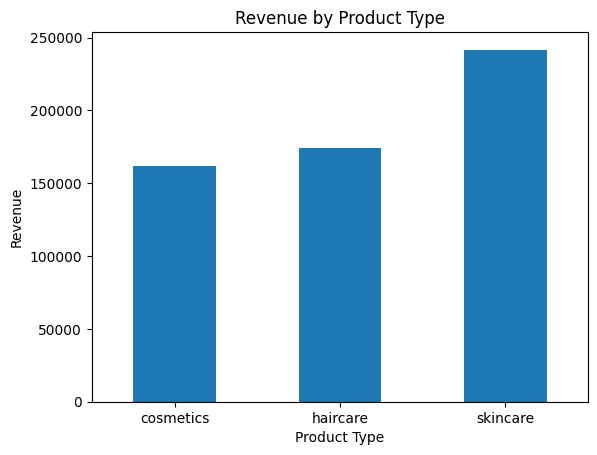

In [15]:
#Analyze Revenue by Product Category
revenue_by_product = df.groupby('Product type')['Revenue generated'].sum()
revenue_by_product.plot(kind='bar', title='Revenue by Product Type', xlabel='Product Type', ylabel='Revenue')
plt.xticks(rotation=0)


<Axes: title={'center': 'Top 10 SKUs by Sales Volume'}, xlabel='SKU', ylabel='Units Sold'>

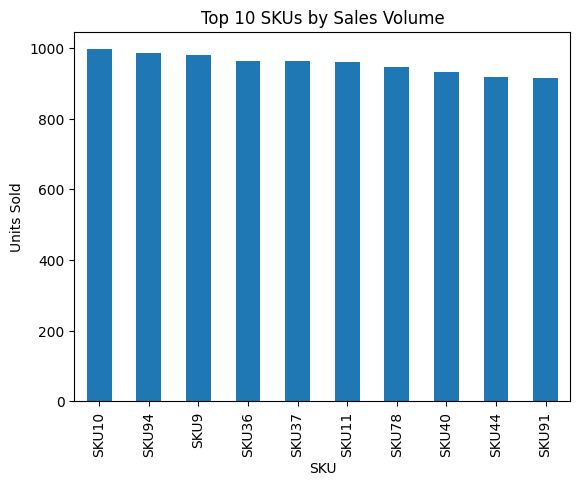

In [16]:
#Top 10 SKU sold quantity

top_skus = df.groupby('SKU')['Number of products sold'].sum().nlargest(10)
top_skus.plot(kind='bar', title='Top 10 SKUs by Sales Volume', xlabel='SKU', ylabel='Units Sold')


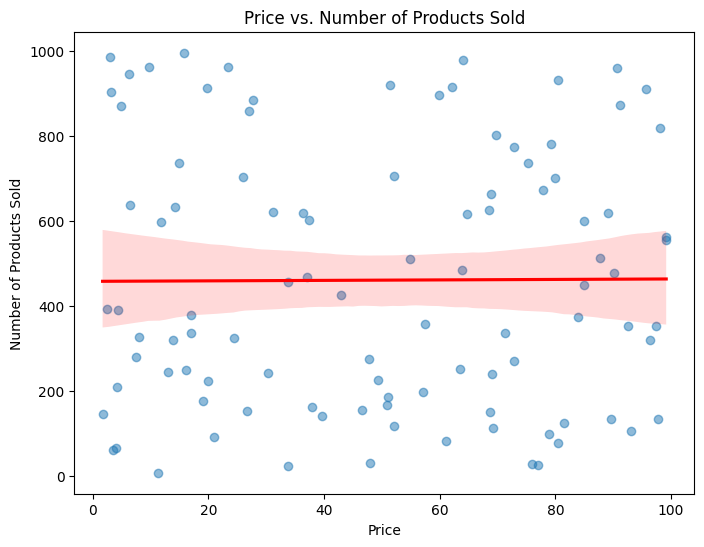

In [19]:
#Analyze to see a relation between Price and Number of Products Sold

plt.figure(figsize=(8,6))
sns.regplot(x=df['Price'], y=df['Number of products sold'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Labels and title
plt.xlabel('Price')
plt.ylabel('Number of Products Sold')
plt.title('Price vs. Number of Products Sold')

# Show the plot
plt.show()

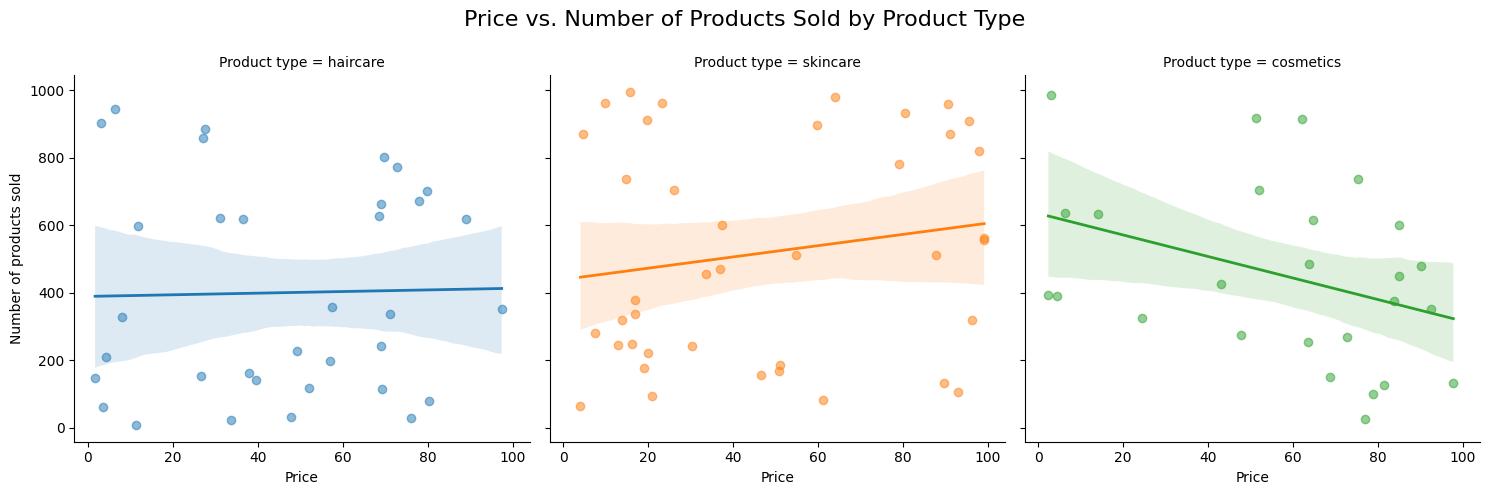

In [20]:
#Analyze to see a relation between Price and Number of Products Sold based on Category of Products

sns.lmplot(
    data=df, 
    x="Price", 
    y="Number of products sold", 
    hue="Product type",  # Different colors for each category
    col="Product type",  # Create separate plots for each category
    scatter_kws={'alpha': 0.5}, 
    line_kws={'lw': 2}
)

# Adjust layout for better readability
plt.subplots_adjust(top=0.85)
plt.suptitle("Price vs. Number of Products Sold by Product Type", fontsize=16)

plt.show()

C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Revenue generated', ylabel='Count'>

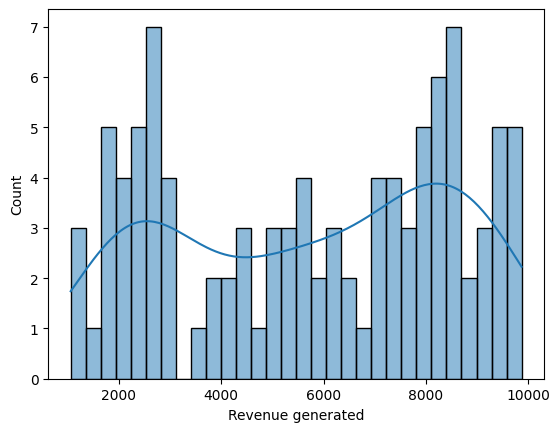

In [27]:
#Revenue Distribution

sns.histplot(df['Revenue generated'], bins=30, kde=True)

C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wil

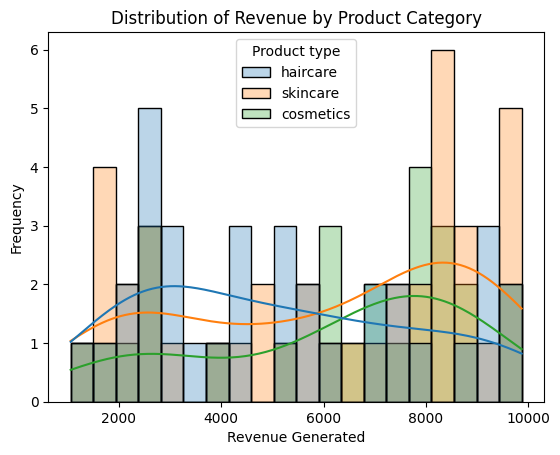

In [98]:
#Revenue Distrubition by Product Category

sns.histplot(
    data=df, 
    x="Revenue generated", 
    hue="Product type",  # Different colors for each product category
    kde=True,  # Add Kernel Density Estimate (optional)
    bins=20,  # Adjust bin size
    alpha=0.3  # Transparency for better visibility
)

# Labels and title
plt.xlabel("Revenue Generated")
plt.ylabel("Frequency")
plt.title("Distribution of Revenue by Product Category")
plt.show()

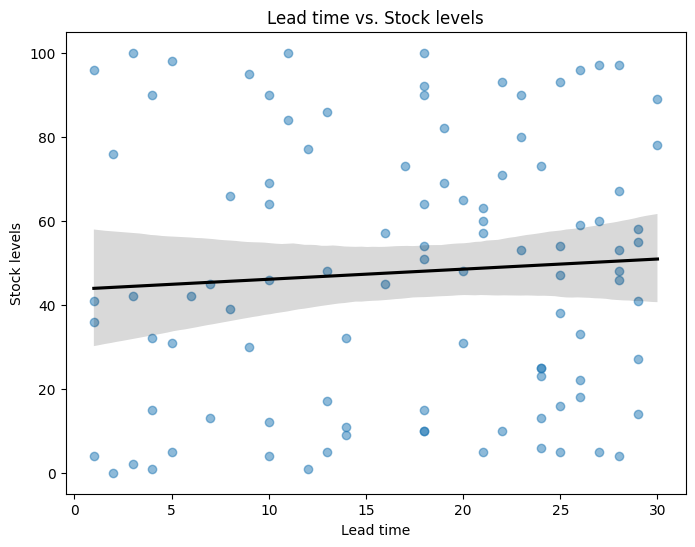

In [35]:
#Scatter Plot and Regression Line for Lead time and Stock levels

plt.figure(figsize=(8,6))
sns.regplot(x=df['Lead time'], y=df['Stock levels'], scatter_kws={'alpha':0.5}, line_kws={'color':'black'})

# Labels and title
plt.xlabel('Lead time')
plt.ylabel('Stock levels')
plt.title('Lead time vs. Stock levels')

# Show the plot
plt.show()

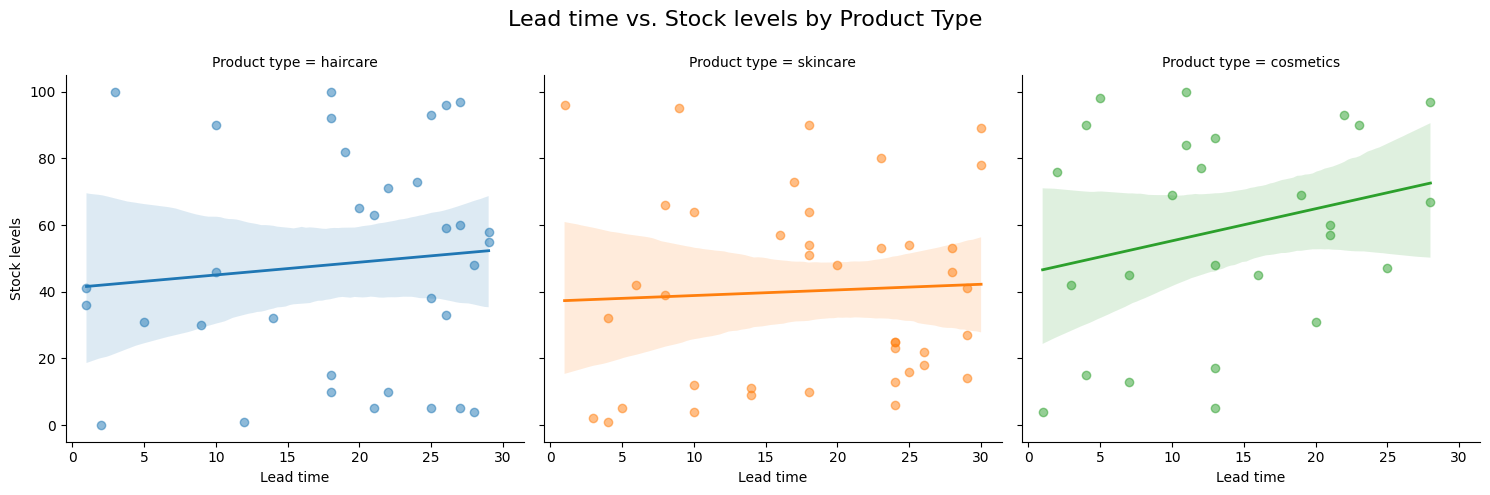

In [37]:
#scatter plot and regression line based on category
sns.lmplot(
    data=df, 
    x="Lead time", 
    y="Stock levels", 
    hue="Product type",  # Different colors for each category
    col="Product type",  # Create separate plots for each category
    scatter_kws={'alpha': 0.5}, 
    line_kws={'lw': 2}
)

# Adjust layout for better readability
plt.subplots_adjust(top=0.85)
plt.suptitle("Lead time vs. Stock levels by Product Type", fontsize=16)

plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Carrier A'), Text(1, 0, 'Carrier B'), Text(2, 0, 'Carrier C')])

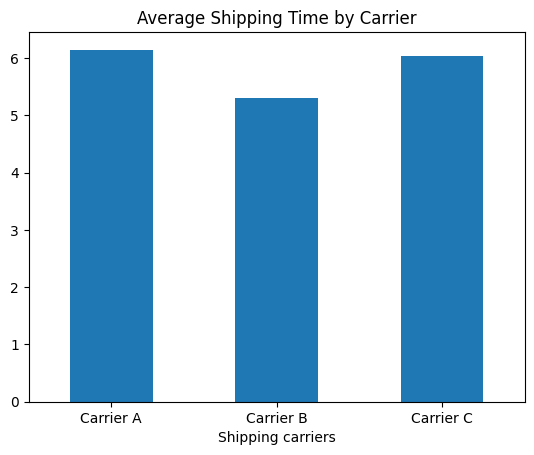

In [39]:
#Analyzing Shipping time by carrier
shipping_performance = df.groupby('Shipping carriers')['Shipping times'].mean()
shipping_performance.plot(kind='bar', title='Average Shipping Time by Carrier')
plt.xticks(rotation=0)


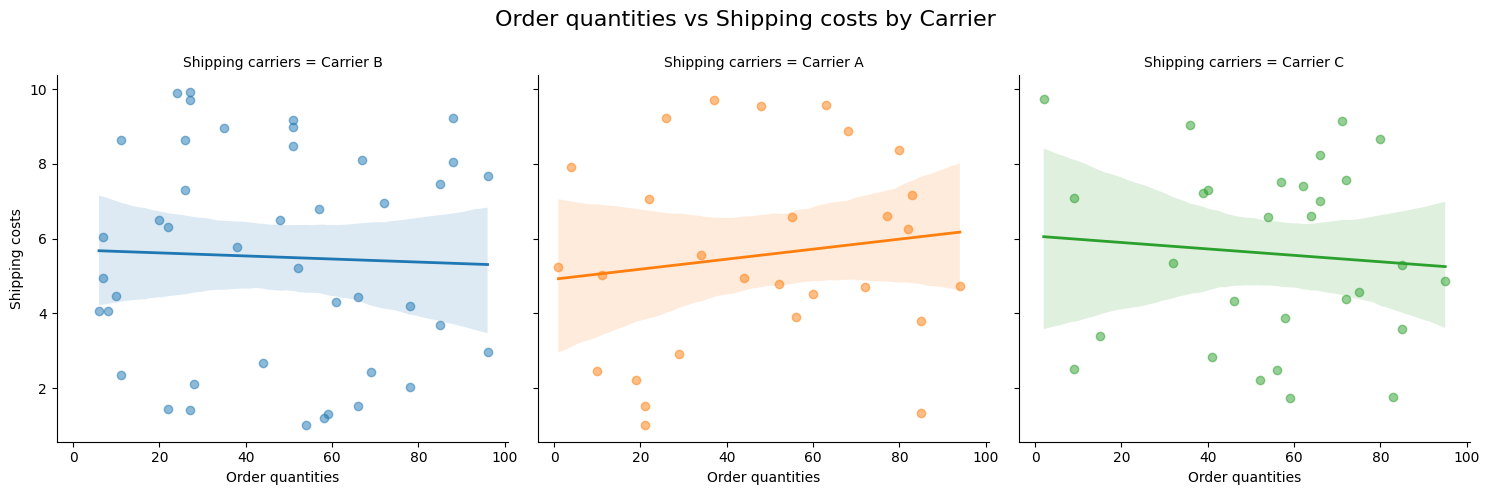

In [102]:
#Analyzing order quantities vs shipping costs based on carrier
sns.lmplot(
    data=df, 
    x="Order quantities", 
    y="Shipping costs", 
    hue="Shipping carriers",  # Different colors for each category
    col="Shipping carriers",  # Create separate plots for each category
    scatter_kws={'alpha': 0.5}, 
    line_kws={'lw': 2}
)

# Adjust layout for better readability
plt.subplots_adjust(top=0.85)
plt.suptitle("Order quantities vs Shipping costs by Carrier", fontsize=16)

plt.show()
#Carrier C and B have good economics of scale as the ordeer quantity increases, the shipping cost decreases
#Carrier A does not have good econmoics as they have positive correlation while also having a higher average shipping time, and the company might have to
#revisit their contract with shipping company


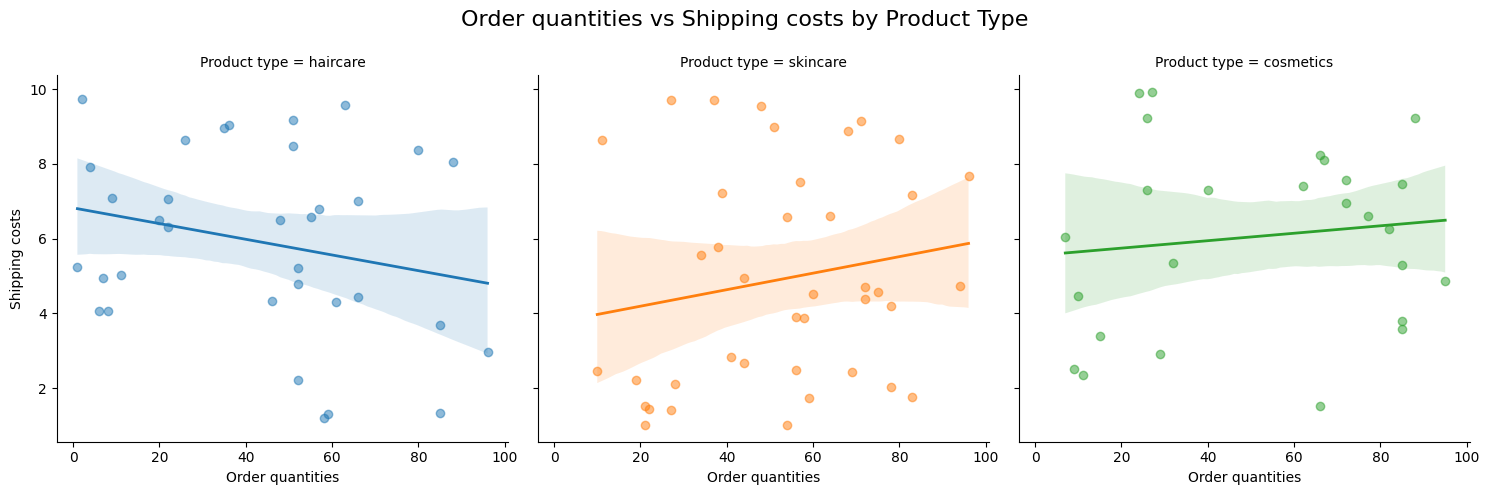

In [49]:
##Analyzing order quantities vs shipping costs based on product type

sns.lmplot(
    data=df, 
    x="Order quantities", 
    y="Shipping costs", 
    hue="Product type",  # Different colors for each category
    col="Product type",  # Create separate plots for each category
    scatter_kws={'alpha': 0.5}, 
    line_kws={'lw': 2}
)

# Adjust layout for better readability
plt.subplots_adjust(top=0.85)
plt.suptitle("Order quantities vs Shipping costs by Product Type", fontsize=16)

plt.show()
#Haircare product type has good economics of scale as the ordeer quantity increases, the shipping cost decreases
#both skincare and cosmetics do not have good econmoics as they have positive correlation, and the company might have to
#revisit their contract with shipping company

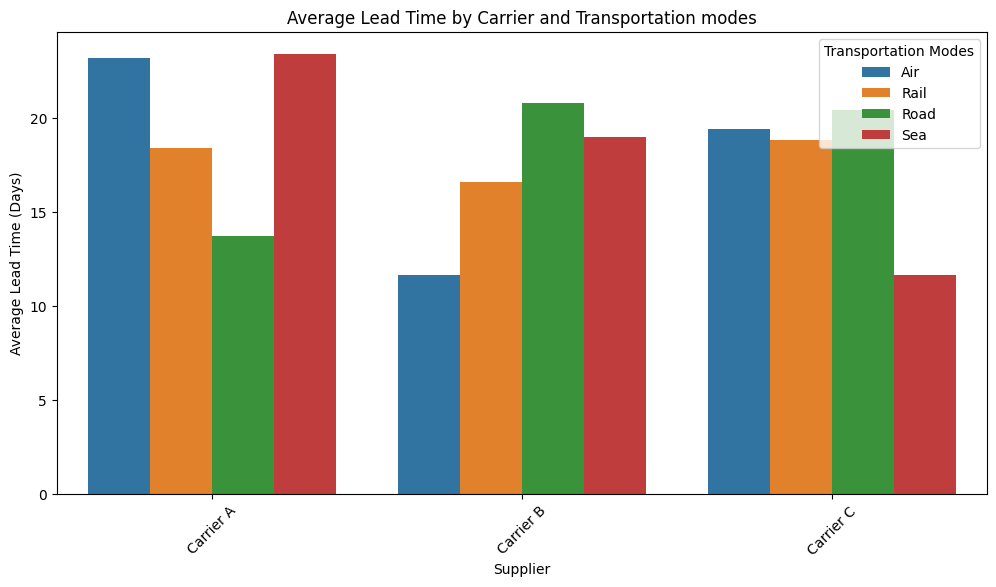

In [100]:
#barplot showing avg lead time for carriers and their transportation modes

supplier_category_lead_time = df.groupby(['Shipping carriers', 'Transportation modes'])['Lead time'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=supplier_category_lead_time, x='Shipping carriers', y='Lead time', hue='Transportation modes')

# Customize plot
plt.title('Average Lead Time by Carrier and Transportation modes')
plt.xlabel('Supplier')
plt.ylabel('Average Lead Time (Days)')
plt.xticks(rotation=45)
plt.legend(title='Transportation Modes')

# Display the plot
plt.show()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Supplier 1'),
  Text(1, 0, 'Supplier 2'),
  Text(2, 0, 'Supplier 3'),
  Text(3, 0, 'Supplier 4'),
  Text(4, 0, 'Supplier 5')])

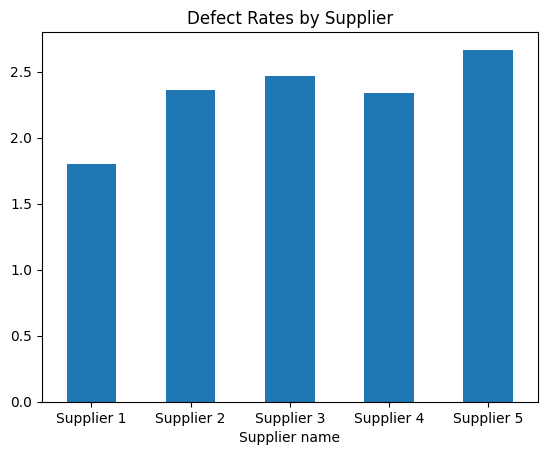

In [53]:
#Analyzing Defect Rates
defect_rates = df.groupby('Supplier name')['Defect rates'].mean()
defect_rates.plot(kind='bar', title='Defect Rates by Supplier')
plt.xticks(rotation=0)


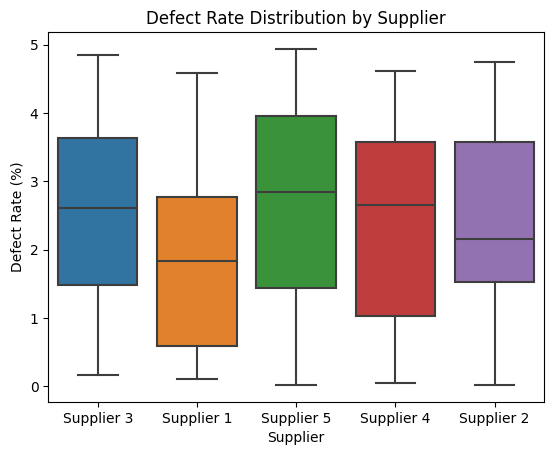

In [55]:
#Defect Rates box plot based on suppliers
sns.boxplot(data=df, x="Supplier name", y="Defect rates")
plt.xticks(rotation=0)
plt.title("Defect Rate Distribution by Supplier")
plt.xlabel("Supplier")
plt.ylabel("Defect Rate (%)")
plt.show()

C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wil

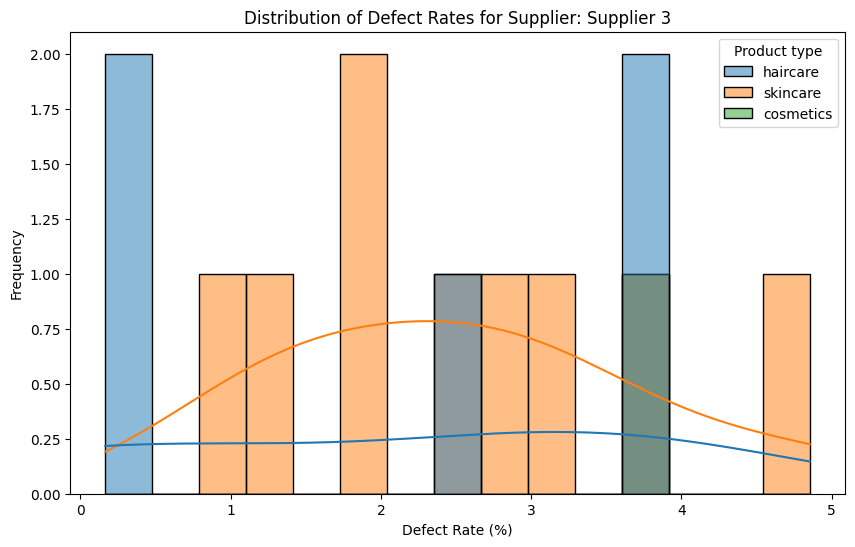

C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wil

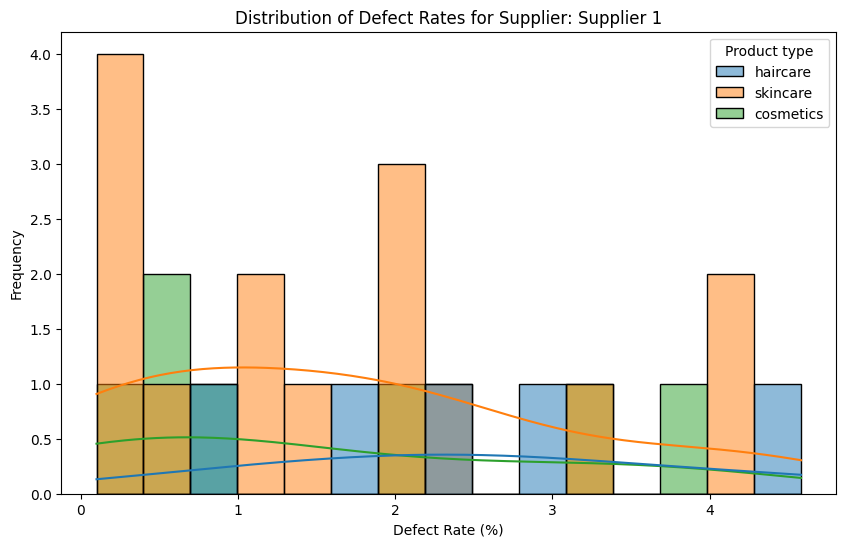

C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wil

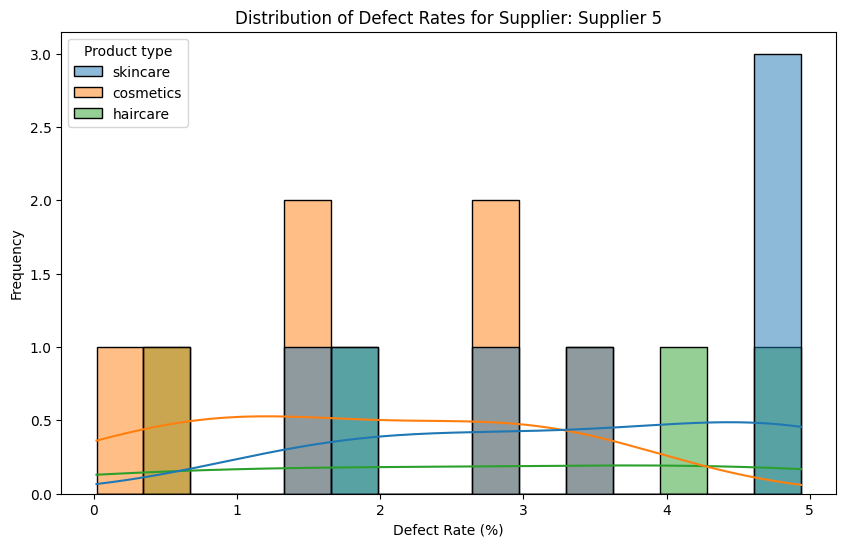

C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wil

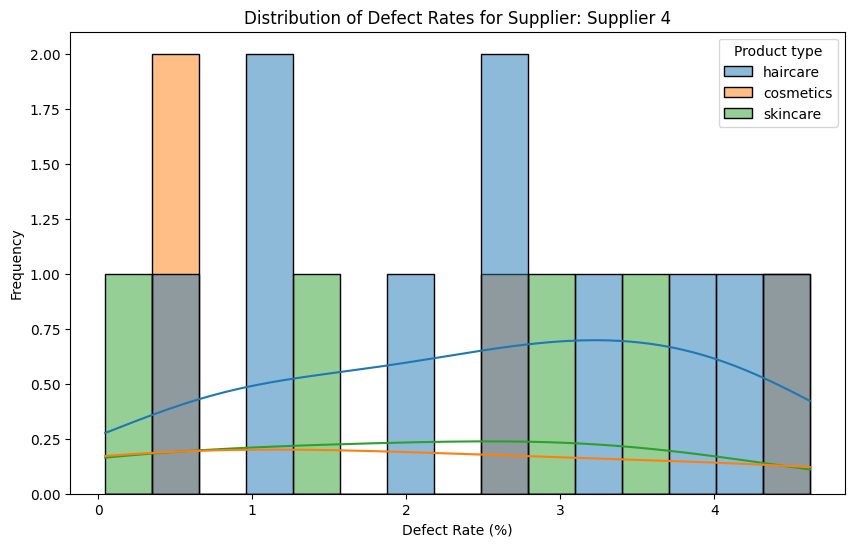

C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wil

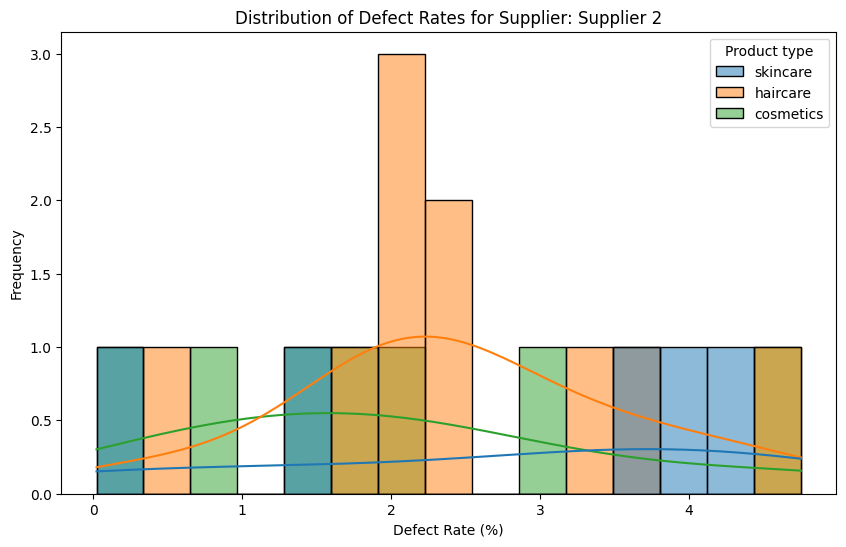

In [84]:
#Histogram for defect rates of suppliers based on categories


# List unique suppliers
suppliers = df['Supplier name'].unique()

# Loop through each supplier and plot
for supplier in suppliers:
    # Filter data for each supplier
    supplier_data = df[df['Supplier name'] == supplier]
    
    # Create a new figure for each supplier
    plt.figure(figsize=(10,6))
    
    # Plot histogram with KDE for Defect rates by Product Type
    sns.histplot(data=supplier_data, x="Defect rates", hue="Product type", kde=True, bins=15, alpha=0.5)
    
    # Set plot labels and title
    plt.title(f"Distribution of Defect Rates for Supplier: {supplier}")
    plt.xlabel("Defect Rate (%)")
    plt.ylabel("Frequency")
    
    # Show the plot
    plt.show()

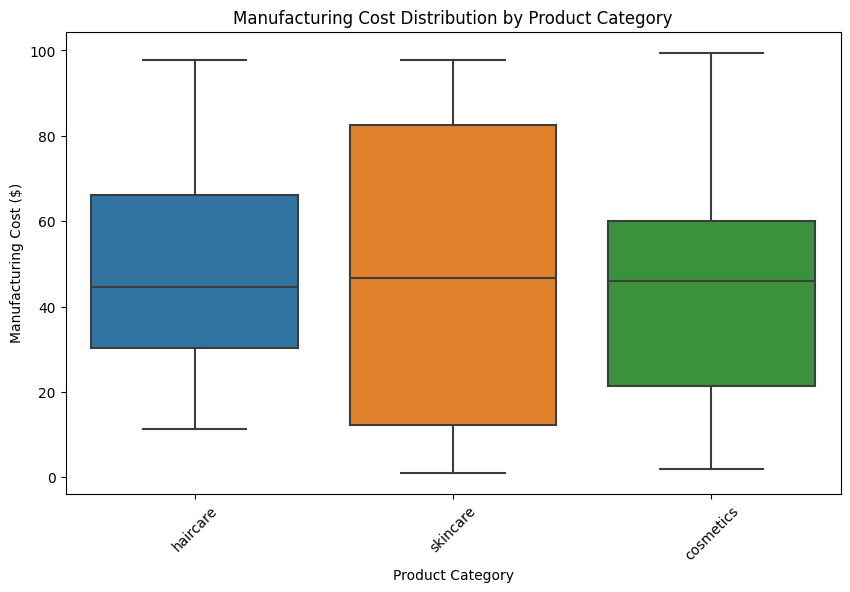

In [63]:
#Manufacturing Cost Box Plot by Product Category

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Product type", y="Manufacturing costs")
plt.xticks(rotation=45)
plt.title("Manufacturing Cost Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Manufacturing Cost ($)")
plt.show()

C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Diwash\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wil

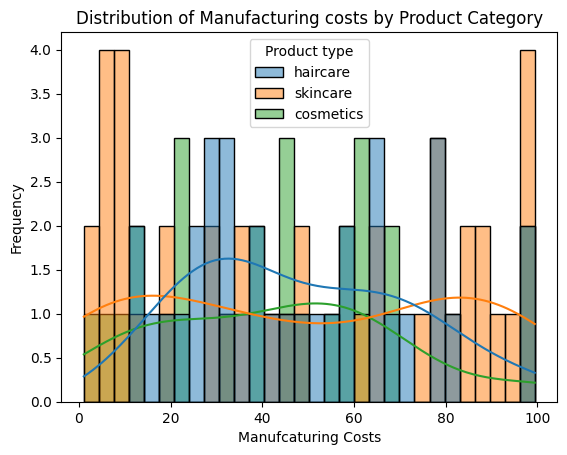

In [85]:
#Manufacturing Cost Histogram by Product Category
sns.histplot(data=df, x="Manufacturing costs", hue="Product type", kde=True, bins=30, alpha=0.5)
plt.title("Distribution of Manufacturing costs by Product Category")
plt.xlabel("Manufcaturing Costs")
plt.ylabel("Frequency")
plt.show()

<Axes: title={'center': 'Revenue by Location'}, xlabel='Location'>

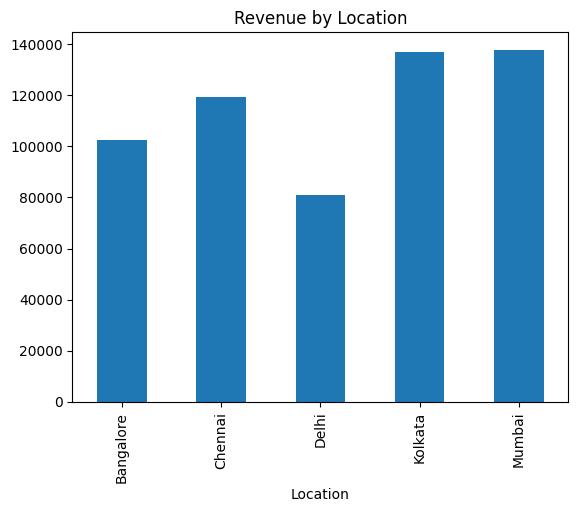

In [92]:
#Revenue Analysis by Geographic
df.groupby('Location')['Revenue generated'].sum().plot(kind='bar', title='Revenue by Location')


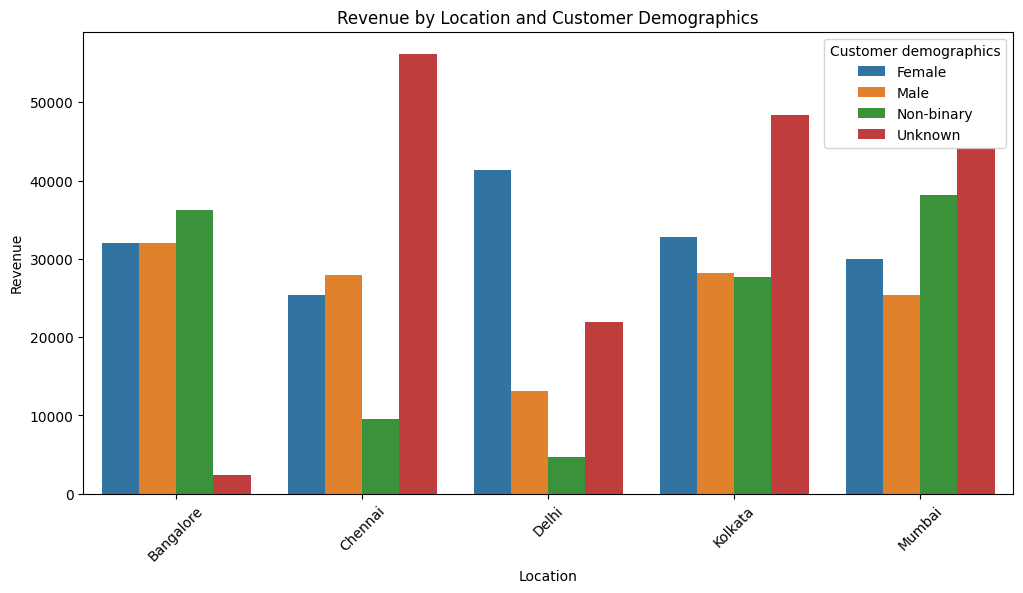

In [103]:
#Understanding Customer Demographics

customer_demographics = df.groupby(['Location', 'Customer demographics'])['Revenue generated'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_demographics, x='Location', y='Revenue generated', hue='Customer demographics')

# Customize plot
plt.title('Revenue by Location and Customer Demographics')
plt.xlabel('Location')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Customer demographics')

# Display the plot
plt.show()


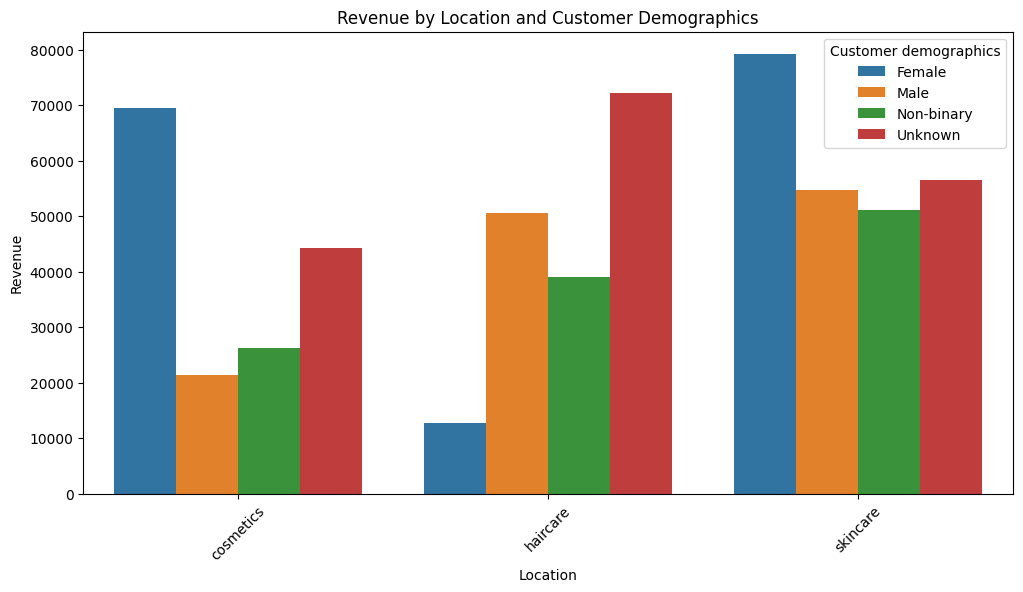

In [105]:
customer_demographics_product = df.groupby(['Product type', 'Customer demographics'])['Revenue generated'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_demographics_product, x='Product type', y='Revenue generated', hue='Customer demographics')

# Customize plot
plt.title('Revenue by Location and Customer Demographics')
plt.xlabel('Location')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Customer demographics')

# Display the plot
plt.show()
